In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import imageio.v2 as imageio
from glob import glob
image_name = 'Nov_2020'

## Normalize RGB

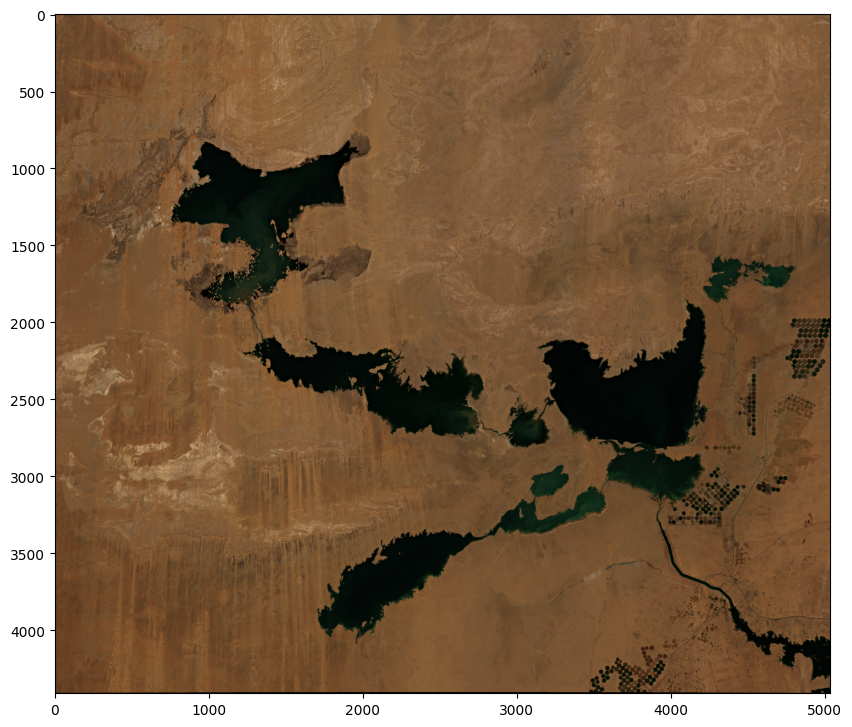

In [2]:
rgb_image = cv2.imread(f"preprocess/sentinel_2/{image_name}.tif", -1)
plt.figure(figsize=(10,15))
plt.imshow(rgb_image[:,:,::-1])
plt.show()

In [5]:
dataset = glob("preprocess/sentinel_2/*.tif")
pixels_sum = 0
pixels_total = 0
for image_path in dataset:
    image = cv2.imread(image_path)
    pixels_sum += image.sum(axis=(0,1))

pixels_mean = pixels_sum / (rgb_image[:,:,0].size * 9)
np.round(pixels_mean,2)

array([ 53.35,  87.44, 122.12])

In [6]:
pixels_mean = np.round(pixels_mean,2)
pixels_mean

array([ 53.35,  87.44, 122.12])

In [7]:
sum_squared_diff = 0 
for image_path in dataset:
    image = cv2.imread(image_path)
    squared_diff = ((image - pixels_mean)**2).sum(axis=(0,1))
    sum_squared_diff += squared_diff

In [8]:
std = np.sqrt(sum_squared_diff / (image[:,:,0].size * 9))
std = np.round(std,2)
std

array([15.43, 22.34, 33.72])

In [4]:
mean = np.array([ 53.35,  87.44, 122.12])
std = np.array([15.43, 22.34, 33.72])
dataset = glob("preprocess/sentinel_2/*.tif")

In [5]:
# Normalize the RGB Dataset
for image_path in dataset:
    image = cv2.imread(image_path)
    #image_32 = image.astype(np.float32)
    image_id = image_path.split('/')[-1].split('.')[0]
    normalized_rgb_image = (image- mean) / std
    normalized_rgb_image = normalized_rgb_image.astype(np.float16)
    imageio.imwrite(f"processed/sentinel_2/{image_id}.tif", normalized_rgb_image)

In [6]:
norm_rgb_image = imageio.imread("processed/sentinel_2/Nov_2020.tif")
print(norm_rgb_image.min(axis=(0,1)), norm_rgb_image.max(axis=(0,1))) 
norm_rgb_image.mean(axis=(0,1)) , norm_rgb_image.astype(np.float32).std(axis=(0,1))

[-3.457 -3.914 -3.621] [10.414  6.785  3.941]


(array([-0.3704, -0.411 , -0.3867], dtype=float16),
 array([1.0807343, 1.1262975, 1.139711 ], dtype=float32))

In [8]:
norm_rgb_image = imageio.imread("processed/sentinel_2/May_2020.tif")
print(norm_rgb_image.min(axis=(0,1)), norm_rgb_image.max(axis=(0,1))) 
norm_rgb_image.mean(axis=(0,1)) , norm_rgb_image.astype(np.float32).std(axis=(0,1))

[-3.457 -3.914 -3.621] [10.22   6.605  3.941]


(array([0.11865, 0.1304 , 0.0871 ], dtype=float16),
 array([1.0173161, 1.0671165, 1.1010443], dtype=float32))